In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('training.csv')
df.head()

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,...,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,water,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,water,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,...,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810
3,water,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,...,-1025.880,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550
4,water,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727


EDA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       10545 non-null  object 
 1   max_ndvi    10545 non-null  float64
 2   20150720_N  10545 non-null  float64
 3   20150602_N  10545 non-null  float64
 4   20150517_N  10545 non-null  float64
 5   20150501_N  10545 non-null  float64
 6   20150415_N  10545 non-null  float64
 7   20150330_N  10545 non-null  float64
 8   20150314_N  10545 non-null  float64
 9   20150226_N  10545 non-null  float64
 10  20150210_N  10545 non-null  float64
 11  20150125_N  10545 non-null  float64
 12  20150109_N  10545 non-null  float64
 13  20141117_N  10545 non-null  float64
 14  20141101_N  10545 non-null  float64
 15  20141016_N  10545 non-null  float64
 16  20140930_N  10545 non-null  float64
 17  20140813_N  10545 non-null  float64
 18  20140626_N  10545 non-null  float64
 19  20140610_N  10545 non-nul

In [6]:
df.columns

Index(['class', 'max_ndvi', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [7]:
df.describe()

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,...,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000
mean,7282.721268,5713.832981,4777.434284,4352.914883,5077.372030,2871.423540,4898.348680,3338.303406,4902.600296,4249.307925,...,4787.492858,3640.367446,3027.313647,3022.054677,2041.609136,2691.604363,2058.300423,6109.309315,2563.511596,2558.926018
std,1603.782784,2283.945491,2735.244614,2870.619613,2512.162084,2675.074079,2578.318759,2421.309390,2691.397266,2777.809493,...,2745.333581,2298.281052,2054.223951,2176.307289,2020.499263,2408.279935,2212.018257,1944.613487,2336.052498,2413.851082
min,563.444000,-433.735000,-1781.790000,-2939.740000,-3536.540000,-1815.630000,-5992.080000,-1677.600000,-2624.640000,-3403.050000,...,-3765.860000,-1043.160000,-4869.010000,-1505.780000,-1445.370000,-4354.630000,-232.292000,-6807.550000,-2139.860000,-4145.250000
25%,7285.310000,4027.570000,2060.600000,1446.940000,2984.370000,526.911000,2456.310000,1017.710000,2321.550000,1379.210000,...,2003.930000,1392.390000,1405.020000,1010.180000,429.881000,766.451000,494.858000,5646.670000,689.922000,685.680000
50%,7886.260000,6737.730000,5270.020000,4394.340000,5584.070000,1584.970000,5638.400000,2872.980000,5672.730000,4278.880000,...,5266.930000,3596.680000,2671.400000,2619.180000,1245.900000,1511.180000,931.713000,6862.060000,1506.570000,1458.870000
75%,8121.780000,7589.020000,7484.110000,7317.950000,7440.210000,5460.080000,7245.040000,5516.610000,7395.610000,7144.480000,...,7549.430000,5817.750000,4174.010000,4837.610000,3016.520000,4508.510000,2950.880000,7378.020000,4208.730000,4112.550000
max,8650.500000,8377.720000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7919.070000,8206.780000,8235.400000,8247.630000,8410.330000,8418.230000,8502.020000


In [8]:
df.isnull()

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10541,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10542,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

class         0
max_ndvi      0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [12]:
df['class'].value_counts()

forest        7431
farm          1441
impervious     969
grass          446
water          205
orchard         53
Name: class, dtype: int64

Data visualisation

forest:  7431
farm:  1441
impervious:  969
grass:  446
water:  205
orchard:  53


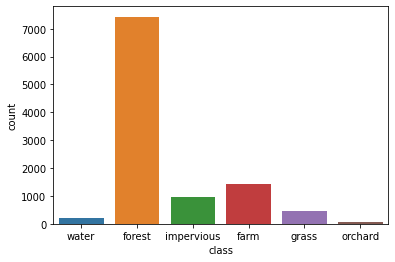

In [13]:
# Plotting the type of land vs Number of occurences
sns.countplot(data=df, x = 'class', label='Count')
fr, fa, imp, gr, wa, orc  = df['class'].value_counts()
print('forest: ',fr)
print('farm: ',fa)
print('impervious: ',imp)
print('grass: ',gr)
print('water: ',wa)
print('orchard: ',orc)

feature engineering

In [53]:
# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# # perform one-hot encoding on 'class' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(df[['class']]).toarray())

# #merge one-hot encoded columns back with original DataFrame
# final_df = df.join(encoder_df)

# #view final df
# print(final_df)

In [30]:
# print(final_df.loc[final_df['class']=='orchard'].head())

In [29]:
# drop 'class' column
# final_df.drop('class', axis=1, inplace=True)


In [52]:
# # renaming the columns
# final_df.rename(columns = {5:'water',0:'farm',1:'forest',2:'grass',3:'impervious',4:'orchard'}, inplace = True)
# print(final_df)

splitting the dataset

In [43]:
y=df['class']
X = df.drop(['class'], axis=1)
X.head(3)

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,997.904,637.595,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,-1325.64,...,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,914.198,634.240,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,3800.810,1671.340,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,1283.63,...,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810


In [44]:
y.head()

0    water
1    water
2    water
3    water
4    water
Name: class, dtype: object

**correlation between features**

In [45]:
map_corr = X.corr()
map_corr

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
max_ndvi,1.000000,0.578107,0.440258,0.444904,0.543092,0.229725,0.462855,0.250101,0.515929,0.370539,...,0.422561,0.292086,0.248299,0.281613,0.219089,0.285901,0.259365,0.844788,0.223765,0.216677
20150720_N,0.578107,1.000000,0.195431,0.331942,0.473371,0.114487,0.207931,0.026875,0.290102,0.161009,...,0.239311,0.341046,0.193955,0.199956,0.102621,0.201553,0.054973,0.499929,0.124718,0.141264
20150602_N,0.440258,0.195431,1.000000,0.214937,0.193980,0.494569,0.418051,0.239266,0.320833,0.465054,...,0.406945,0.089858,0.132021,0.038350,0.355109,0.197017,0.450043,0.381121,0.441204,0.239930
20150517_N,0.444904,0.331942,0.214937,1.000000,0.422241,0.079452,0.191357,0.045328,0.291893,0.116025,...,0.134723,0.182728,0.044826,0.206130,0.078754,0.222905,0.105096,0.375727,0.067778,0.122279
20150501_N,0.543092,0.473371,0.193980,0.422241,1.000000,0.113853,0.226913,0.023459,0.304795,0.115780,...,0.223104,0.243508,0.077998,0.219817,0.024442,0.312445,0.092791,0.492222,0.104700,0.042711
20150415_N,0.229725,0.114487,0.494569,0.079452,0.113853,1.000000,0.373261,0.060950,0.293153,0.481182,...,0.419160,-0.050686,0.030754,-0.138086,0.320464,0.186767,0.500064,0.221665,0.514840,0.138563
20150330_N,0.462855,0.207931,0.418051,0.191357,0.226913,0.373261,1.000000,0.243872,0.256524,0.359052,...,0.273112,0.060333,0.089276,0.097646,0.253693,0.166668,0.298917,0.423475,0.292923,0.169820
20150314_N,0.250101,0.026875,0.239266,0.045328,0.023459,0.060950,0.243872,1.000000,0.188262,0.194930,...,0.077772,0.061216,0.045676,0.144983,0.285395,0.034793,0.212003,0.223152,0.116647,0.197237
20150226_N,0.515929,0.290102,0.320833,0.291893,0.304795,0.293153,0.256524,0.188262,1.000000,0.354842,...,0.316120,0.124008,0.107529,0.074983,0.206002,0.246307,0.238854,0.473251,0.267069,0.193272
20150210_N,0.370539,0.161009,0.465054,0.116025,0.115780,0.481182,0.359052,0.194930,0.354842,1.000000,...,0.501332,0.003724,0.042303,-0.093501,0.348783,0.096264,0.480709,0.394547,0.593371,0.125988


Text(0.5, 1.0, 'Correlation between all the features')

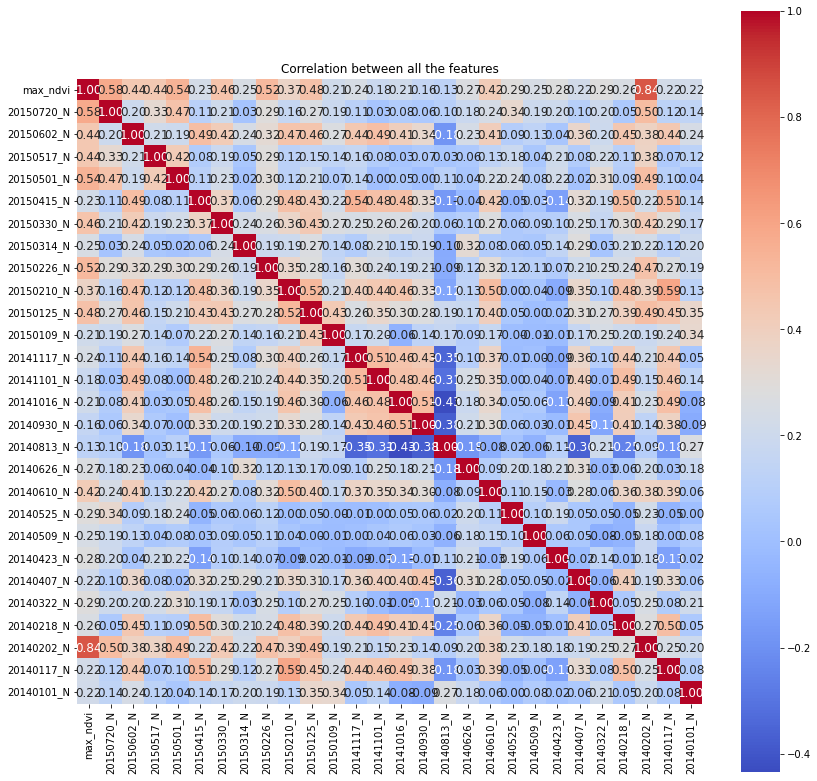

In [46]:
# Plotting Heatmaps for Correlations between all the features
plt.figure(figsize=(14,14))
sns.heatmap(map_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

model building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7065, 28)
(7065,)
(3480, 28)
(3480,)


random forest classifier

In [54]:
random_forest = RandomForestClassifier(random_state = 1, max_depth = 15,n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
random_forest.fit(X_train, y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 99.77
Random Forest Test Score: 
 94.02
Accuracy: 
 0.9402298850574713
[[ 387   59    1   12    0    0]
 [   8 2436    3    6    0    0]
 [   7   23  107   15    0    0]
 [  24   20    4  292    0    0]
 [   2   11    0    0    2    0]
 [   3    4    0    6    0   48]]
              precision    recall  f1-score   support

        farm       0.90      0.84      0.87       459
      forest       0.95      0.99      0.97      2453
       grass       0.93      0.70      0.80       152
  impervious       0.88      0.86      0.87       340
     orchard       1.00      0.13      0.24        15
       water       1.00      0.79      0.88        61

    accuracy                           0.94      3480
   macro avg       0.94      0.72      0.77      3480
weighted avg       0.94      0.94      0.94      3480



confusion matrix

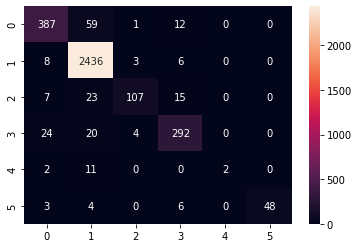

In [55]:
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [56]:
print(confusion_matrix(y_test,rf_predicted))

[[ 387   59    1   12    0    0]
 [   8 2436    3    6    0    0]
 [   7   23  107   15    0    0]
 [  24   20    4  292    0    0]
 [   2   11    0    0    2    0]
 [   3    4    0    6    0   48]]
